Pandas Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###`Q-1:` Write a program to create an empty series.

In [2]:
# code here
x = pd.Series()
x

Series([], dtype: object)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [3]:
# code here
x = pd.Series([2,4,6,8,10])
y = pd.Series([1,3,5,7,9])

print(x+y)
print(x*y)
print(x-y)
print(x/y)

0     3
1     7
2    11
3    15
4    19
dtype: int64
0     2
1    12
2    30
3    56
4    90
dtype: int64
0    1
1    1
2    1
3    1
4    1
dtype: int64
0    2.000000
1    1.333333
2    1.200000
3    1.142857
4    1.111111
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [4]:
# code here
print(x==y)

0    False
1    False
2    False
3    False
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [6]:
# code here
def change_type(series):
    return pd.to_numeric(series,errors = 'coerce')

series = pd.Series([1,2,'Python', 2.0, True, 100])
print(change_type(series))

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [9]:
# code here
data = pd.read_csv('batsman_runs_series.csv')
data.sort_values('batsman_run',ascending=False).head(10)
data['batsman_run'].sort_values(ascending=False).reset_index().head(5)

,index,batsman_run
0,569,6634
1,462,6244
2,130,5883
3,430,5881
4,493,5536


In [ ]:
data['batsman_run']>3000

0      False
1      False
2      False
3      False
4      False
       ...  
600    False
601    False
602    False
603    False
604    False
Name: batsman_run, Length: 605, dtype: bool

###`Q-7` No of players having runs above 3000

In [ ]:
# code here
data[data['batsman_run']>3000].shape[0]

20

###`Q-8` No of players having runs above mean value?

In [ ]:
# code here
data[data['batsman_run'] >= data['batsman_run'].mean()].count()

# also shape will give count of total batsman

batter         128
batsman_run    128
dtype: int64

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [11]:
# code here
item = pd.read_csv('items.csv',index_col=['item_name']).squeeze('columns')
item

# 1 question
item[item.isna()].shape[0]
item[item.isna()]

# 2 question
# convert doller to rupees
def rupees(x):
    try:
        y = x[1:]
    except:
        y=x   # here some values are not in doller so we are take values as it is
    return float(y)*82.50

item.apply(rupees)


items = item.apply(rupees)
# 4 question 
items.fillna(items.mean())

item_name
Chips and Fresh Tomato Salsa              197.175
Izze                                      279.675
Nantucket Nectar                          279.675
Chips and Tomatillo-Green Chili Salsa     197.175
Chicken Bowl                             1400.850
                                           ...   
Steak Burrito                             969.375
Steak Burrito                             969.375
Chicken Salad Bowl                        928.125
Chicken Salad Bowl                        721.875
Chicken Salad Bowl                        721.875
Name: item_price, Length: 4622, dtype: float64

###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [12]:
# code here
# 1
items.mean()

np.float64(615.7000984251969)

In [13]:
# series mai numpy ki tarah percentile function nahi hai
# to hame iss jagah quatile use karana hoga
items.quantile(q=0.3)  # 0.3 means 30th
items.quantile(q =0.06)

np.float64(103.125)

<Axes: ylabel='Frequency'>

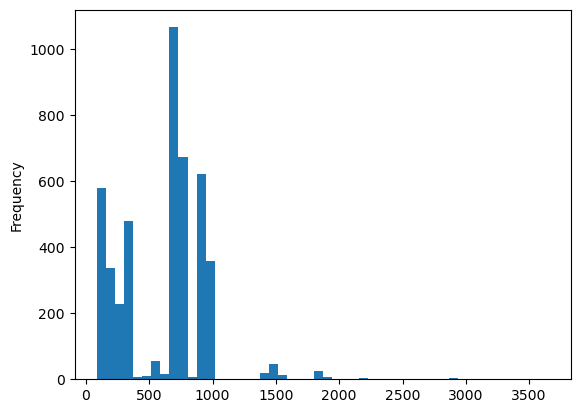

In [14]:
items.plot(kind='hist',bins=50)

In [ ]:
items[(items > 1000) & (items < 2000)]

item_name
Chicken Bowl           1400.85
Chicken Salad Bowl     1856.25
Steak Burrito          1483.35
Chicken Burrito        1443.75
Chicken Bowl           1443.75
                        ...   
Chicken Bowl           1856.25
Steak Bowl             1938.75
Chicken Bowl           1443.75
Chips and Guacamole    1468.50
Chicken Salad Bowl     1443.75
Name: item_price, Length: 116, dtype: float64